#CIS519 Project

### Loading in Data and Necessary Packages

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection as ms
from sklearn import metrics
from sklearn import linear_model
from sklearn import naive_bayes
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
games = pd.read_csv('/content/drive/Shared drives/CIS519/games.csv')

### Data Exploration & Preliminary Analysis

In [ ]:
# Unique openers

unique_openers = []
print(len(games['opening_name']), 'openers')
print(len(games['opening_name'].value_counts()), 'unique openers')

20058 openers
1477 unique openers


In [ ]:
# columns

games.head(2)


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [ ]:
# Datatype of columns

games.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [ ]:
games_not_resigned = games[games.victory_status != 'resign']
len(games_not_resigned)

8911

In [ ]:
len(games_not_resigned[games_not_resigned.turns >= 10])

8716

In [ ]:
games_white_wins = games[games.winner == 'white']
len(games_white_wins)

10001

In [ ]:
len(games_white_wins[games_white_wins.opening_name == "Slav Defense: Exchange Variation"])

7

In [ ]:
slav_ev_opening = games[games.opening_name == "Slav Defense: Exchange Variation"]
len(slav_ev_opening)

19

In [ ]:
moves_less_100 = games[games.turns < 100]
len(moves_less_100)

17436

In [ ]:
print(games['opening_eco'].value_counts())

A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
E35       1
D36       1
D82       1
E46       1
C09       1
Name: opening_eco, Length: 365, dtype: int64


In [ ]:
games_useful = games[['id','winner', 'turns', 'moves']]

In [ ]:
games_useful[['moves','id']]

,moves,id
0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,TZJHLljE
1,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,l1NXvwaE
2,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,mIICvQHh
3,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,kWKvrqYL
4,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,9tXo1AUZ
...,...,...
20053,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,EfqH7VVH
20054,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,WSJDhbPl
20055,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,yrAas0Kj
20056,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,b0v4tRyF


In [ ]:
len(games[games.victory_status != 'draw'])

19152

In [ ]:
print(games['turns'].sum())

1212827


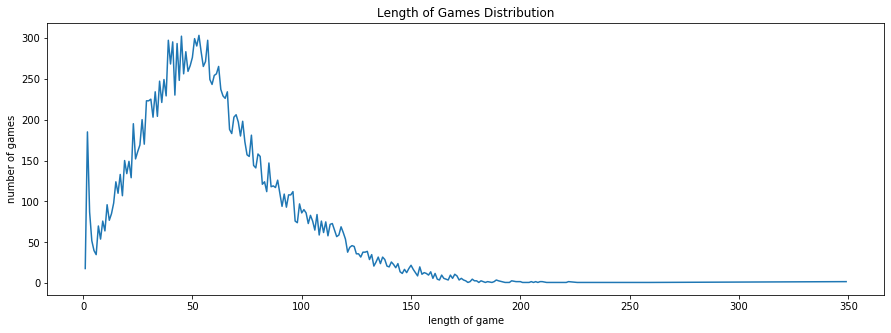

In [ ]:
import matplotlib.pyplot as plt

games_df = games["turns"].value_counts().reset_index().rename(columns = {"index": "length of game", "turns": "number of times game appears"}).sort_values("length of game", ascending = True)

x = games_df["length of game"]
y = games_df["number of times game appears"]

plt.figure(figsize = (15,5))
plt.plot(x,y)
plt.ylabel('number of games')
plt.xlabel("length of game")
plt.title("Length of Games Distribution")
plt.show()

### Data Processing

###### Setup Functions


In [ ]:
games['turns'].std()

33.570584753537055

In [ ]:
cutoff_turns = 30

In [ ]:
games = games.drop_duplicates(subset='id')
games = games[games.winner != 'draw']
failed = pd.Series([406, 454, 875, 1032, 1138, 1672, 1700, 1805, 2035, 2123, \
                    2283, 2334, 2377, 2431, 2554, 2944, 2986, 3001, 3156, 3419, 3616, 4223, 4345, 4795, 5184, 5186, 5387, 5417, 5439, 5516, 5605, 5709, \
                    5718, 5916, 5945, 6156, 6332, 6426, 6629, 6684, 7028, 7087, 7268, 7367, 7369, 7572, 8149, 8186, 8221, 8606, 8705, 8769, 8789, 9034, 9081, \
                    9307, 9319, 9324, 9354, 9553, 9672, 9823, 9836, 9846, 9885, 9898, 9903, 9905, 9907, 9945, 9947, 9966, 10018, 10035, 10045, 10048, 10051, 10052, 10054, \
                    10058, 10063, 10080, 10084, 10093, 10102, 10114, 10117, 10124, 10127, 10130, 10132, 10155, 10156, 10157, 10159, 10214, 10224, 10230, 10242, 10246, 10253, \
                    10257, 10261, 10267, 10268, 10284, 10300, 10365, 10376, 10381, 10382, 10383, 10389, 10391, 10418, 10419, 10427, 10430, 10438, 10493, 10499, 10514, 10531, 10532, \
                    10533, 10536, 10538, 10544, 10552, 10555, 10594, 10602, 10604, 10608, 10614, 10628, 10629, 10646, 10658, 10662, 10708, 10778, 10919, 10980, 11113, 11316, 11436, \
                    11548, 11668, 12068, 12554, 12813, 12952, 13056, 13068, 13331, 13361, 13664, 13747, 14560, 14753, 15015, 15586, 15590, 15721, 15730, 15733, 15850, 15898, 15901, \
                    15934, 16179, 16388, 16398, 16414, 16496, 16669, 16762, 16780, 16920, 17132, 17292, 17394, 17569, 17710, 17774, 17779, 17802, 17937, 18061])
print(len(games))
games = games.drop(games.index[failed])
print(len(games))

18225
18035


In [ ]:
print(len(games[games.turns >= cutoff_turns]))
games_dropped = games[games.turns > cutoff_turns]

15000


In [ ]:
print(len(games_dropped[games_dropped.victory_status != 'resign']))
games_dropped = games_dropped[games.victory_status != 'resign']

6562


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
def create_matrices():
  piece_matrix = [['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'],
                ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
                [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
                [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
                [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
                [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
                ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
                ['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r']
                ]

  color_matrix = [[2, 2, 2, 2, 2, 2, 2, 2],
                  [2, 2, 2, 2, 2, 2, 2, 2],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1]
                  ]

  return piece_matrix, color_matrix
create_matrices()

([['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'],
  ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
  [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
  [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
  [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
  [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
  ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
  ['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r']],
 [[2, 2, 2, 2, 2, 2, 2, 2],
  [2, 2, 2, 2, 2, 2, 2, 2],
  [0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
games_list = []
moves_list = []
for i in games_dropped['moves']:
  games_list.append(i)

for i in games_list:
  curr =[]
  for j in i.split(' '):
    curr1 = []
    curr1.append(j)
    curr.append(curr1)
  moves_list.append(curr)

# moves_list[0:2]

In [ ]:
def number_to_text(row, col):
  """takes a row, col tuple and returns two letter tile"""
  row_dict = {0: '8',
              1: '7',
              2: '6',
              3: '5',
              4: '4',
              5: '3',
              6: '2',
              7: '1'}
  
  col_dict = {0: 'a',
              1: 'b',
              2: 'c',
              3: 'd',
              4: 'e',
              5: 'f',
              6: 'g',
              7: 'h'}
  
  return col_dict[col] + row_dict[row]


def text_to_number(text):
  """takes a two letter move and returns a tuple of the 
  row and col"""
  row = int(text[1])
  col = text[0]

  column_to_number = {"a": 0,
                    "b": 1,
                    "c": 2,
                    "d": 3,
                    "e": 4,
                    "f": 5,
                    "g": 6,
                    "h": 7}

  col = column_to_number[col]
  row = 8 - row

  return row, col

###### Calc. Range Functions

In [ ]:
#Note: all tuples are moving along the x and then the y
def calc_range_knight(piece_position):
  access_range = []
  position_numerical = text_to_number(piece_position)
  piece_color = color_matrix[position_numerical[0]][position_numerical[1]]
  moves = [(2, -1),(2,1),(1, 2),(-1,2),(-2,1),(-2,-1),(-1,-2),(1,-2)] #these are all of the moves of the knight
  for move in moves:
    new_position = [position_numerical[0]+move[0], position_numerical[1]+move[1]] #get the new position
    if in_bounds(new_position[0]) & in_bounds(new_position[1]): #check if in bounds
      if color_matrix[new_position[0]][new_position[1]] == 0 | color_matrix[new_position[0]][new_position[1]] != piece_color: # there is not a piece at that position or  the piece is the oposition color - can check the opposite color 
        access_range.append(number_to_text(new_position[0], new_position[1])) #add that position to the return list - should this be index or the value
  return access_range

def calc_range_bishop(piece_position):
  access_range = []
  position_numerical = text_to_number(piece_position) #get the matrix indices of the position
  piece_color = color_matrix[position_numerical[0]][position_numerical[1]] #get the piece color code for comparison
  directions = [(1,1), (-1,1), (-1,-1), (1,-1)]
  for direction in directions:
    new_position = position_numerical
    while(in_bounds(new_position[0]+direction[0]) & in_bounds(new_position[1]+direction[1])): #check if going to be in bounds when move
      new_position = [new_position[0]+direction[0], new_position[1]+direction[1]] #get the new position
      if color_matrix[new_position[0]][new_position[1]] == 0: # there is not a piece at that position or  the piece is the oposition color - can check the opposite color 
        access_range.append(number_to_text(new_position[0], new_position[1])) #add that position to the return list
      elif(color_matrix[new_position[0]][new_position[1]] != piece_color):
        access_range.append(number_to_text(new_position[0], new_position[1])) #add that position to the return list and stop moving in that direction
        break
      else:
        break  
  return access_range

def in_bounds(board_index):
  if board_index < 0:
    return False
  elif board_index > 7:
    return False
  else:
    return True

In [ ]:
def calc_range_king(square):

    possible_moves_list = []

    column_to_number = {"a": 1,
                        "b": 2,
                        "c": 3,
                        "d": 4,
                        "e": 5,
                        "f": 6,
                        "g": 7,
                        "h": 8}

    number_to_column = {1: "a",
                        2: "b",
                        3: "c",
                        4: "d",
                        5: "e",
                        6: "f",
                        7: "g",
                        8: "h"}

    position_list = list(square)

    column = position_list[0]
    r = position_list[1]
    row = int(r)

    column_num = column_to_number[column]

    piece_color = color_matrix[abs(row-8)][column_num - 1]

    if row + 1 in range(1, 9) and color_matrix[abs(row - 7)][column_num - 1] != piece_color:
        possible_moves_list.append(number_to_column[column_num] + str(row + 1))

    if row - 1 in range(1, 9) and color_matrix[abs(row - 9)][column_num - 1] != piece_color:
        possible_moves_list.append(number_to_column[column_num] + str(row - 1))

    if column_num + 1 in range(1, 9) and color_matrix[abs(row - 8)][column_num] != piece_color:
        possible_moves_list.append(number_to_column[column_num + 1] + str(row))

    if column_num - 1 in range(1, 9) and color_matrix[abs(row - 8)][column_num - 2] != piece_color:
        possible_moves_list.append(number_to_column[column_num - 1] + str(row))

    if row + 1 in range(1, 9) and column_num + 1 in range(1, 9) and color_matrix[abs(row - 7)][column_num] != piece_color:
        possible_moves_list.append(number_to_column[column_num + 1] + str(row + 1))

    if row - 1 in range(1, 9) and column_num + 1 in range(1, 9) and color_matrix[abs(row - 9)][column_num] != piece_color:
        possible_moves_list.append(number_to_column[column_num + 1] + str(row - 1))

    if row - 1 in range(1, 9) and column_num - 1 in range(1, 9) and color_matrix[abs(row - 9)][column_num - 2] != piece_color:
        possible_moves_list.append(number_to_column[column_num - 1] + str(row - 1))

    if row + 1 in range(1, 9) and column_num - 1 in range(1, 9) and color_matrix[abs(row - 7)][column_num - 2] != piece_color:
        possible_moves_list.append(number_to_column[column_num - 1] + str(row + 1))

    return possible_moves_list

In [ ]:
def calc_range_queen(square):

    possible_moves_list = []

    column_to_number = {"a": 1,
                        "b": 2,
                        "c": 3,
                        "d": 4,
                        "e": 5,
                        "f": 6,
                        "g": 7,
                        "h": 8}

    number_to_column = {1: "a",
                        2: "b",
                        3: "c",
                        4: "d",
                        5: "e",
                        6: "f",
                        7: "g",
                        8: "h"}

    position_list = list(square)

    column = position_list[0]
    r = position_list[1]
    row = int(r)

    column_num = column_to_number[column]

    piece_color = color_matrix[abs(row - 8)][column_num - 1]

    # up
    for i in range(1, 8):
        if row + i in range(1, 9) and color_matrix[abs(row - 8 + i)][column_num - 1] != piece_color:
            possible_moves_list.append(number_to_column[column_num] + str(row + i))
            if color_matrix[abs(row - 8 + i)][column_num - 1] != 0:
                break
        else:
            break

    # down
    for i in range(1, 8):
        if row - i in range(1, 9) and color_matrix[abs(row - 8 - i)][column_num - 1] != piece_color:
            possible_moves_list.append(number_to_column[column_num] + str(row - i))
            if color_matrix[abs(row - 8 - i)][column_num - 1] != 0:
                break
        else:
            break

    # right
    for i in range(1, 8):
        if column_num + i in range(1, 9) and color_matrix[abs(row - 8)][column_num + i - 1] != piece_color:
            possible_moves_list.append(number_to_column[column_num + i] + str(row))
            if color_matrix[abs(row - 8)][column_num + i - 1] != 0:
                break
        else:
            break

    # left
    for i in range(1, 8):
        if column_num - i in range(1, 9) and color_matrix[abs(row - 8)][column_num - i - 1] != piece_color:
            possible_moves_list.append(number_to_column[column_num - i] + str(row))
            if color_matrix[abs(row - 8)][column_num - i - 1] != 0:
                break
        else:
            break

    # northeast
    for i in range(1, 8):
        if row + i in range(1, 9) and column_num + i in range(1, 9) and color_matrix[abs(row - 8 + i)][column_num - 1 + i] != piece_color:
            possible_moves_list.append(number_to_column[column_num + i] + str(row + i))
            if color_matrix[abs(row - 8 + i)][column_num - 1 + i] != 0:
                break
        else:
            break

    # southeast
    for i in range(1, 8):
        if row - i in range(1, 9) and column_num + i in range(1, 9) and color_matrix[abs(row - 8 - i)][column_num - 1 + i] != piece_color:
            possible_moves_list.append(number_to_column[column_num + i] + str(row - i))
            if color_matrix[abs(row - 8 - i)][column_num - 1 + i] != 0:
                break
        else:
            break

    # southwest
    for i in range(1, 8):
        if row - i in range(1, 9) and column_num - i in range(1, 9) and color_matrix[abs(row - 8 - i)][column_num - 1 - i] != piece_color:
            possible_moves_list.append(number_to_column[column_num - i] + str(row - i))
            if color_matrix[abs(row - 8 - i)][column_num - 1 - i] != 0:
                break
        else:
            break

    # northwest
    for i in range(1, 8):
        if row + i in range(1, 9) and column_num - i in range(1, 9) and color_matrix[abs(row - 8 + i)][column_num - 1 - i] != piece_color:
            possible_moves_list.append(number_to_column[column_num - i] + str(row + i))
            if color_matrix[abs(row - 8 + i)][column_num - 1 - i] != 0:
                break
        else:
            break

    return possible_moves_list

In [ ]:
# global indexing for the alpha and indices on the chess baord
# need to finalize with the indexing start- 0 or 1 // TO DO with vote from everyone
import numpy as np

chess_map_from_alpha_to_index = {
    "a" : 0,
    "b" : 1,
    "c" : 2,
    "d" : 3,
    "e" : 4,
    "f" : 5,
    "g" : 6,
    "h" : 7
}

chess_map_from_index_to_alpha = {
    0: "a",
    1: "b",
    2: "c",
    3: "d",
    4: "e",
    5: "f",
    6: "g",
    7: "h"
}


In [ ]:
# pawn function for accessible squares.
def calc_range_pawn(cur_pawn_pos):

      chess_map_from_alpha_to_index = {
          "a" : 0,
          "b" : 1,
          "c" : 2,
          "d" : 3,
          "e" : 4,
          "f" : 5,
          "g" : 6,
          "h" : 7
      }

      chess_map_from_index_to_alpha = {
          0: "a",
          1: "b",
          2: "c",
          3: "d",
          4: "e",
          5: "f",
          6: "g",
          7: "h"
      }

      possible_moves = []
      cur_pos = list(cur_pawn_pos) 

      pos_col = cur_pos[0]
      pos_row = cur_pos[1]

      column = chess_map_from_alpha_to_index[pos_col]
      row = 8 - int(pos_row)
      color = color_matrix[row][column]

      if(color == 0):
        raise Exception('Illegal Move! No piece present at position {}'.format(cur_pawn_pos))
      
      board = color_matrix      
      
      if(color == 1):
        # white
        if(row == 6): # check if starting at the initial position for white pawn
          x = row - 1
          for i in range(-1,2,2):
            y = column + i
            if y>=0 and y<8:
              if board[x][y] != color and board[x][y] != 0:
                c = chess_map_from_index_to_alpha[y]
                possible_moves.append((c,str(8-x)))

          for i in range(2):
            x = row - i - 1
            #print('Column {} Row {}'.format(column, x))
            if board[x][column] == 0 : #and new_row+1 < 8: 
              c = chess_map_from_index_to_alpha[column]
              possible_moves.append((c,str(8-x)))
            elif board[x][column] != color:
              break
        else: # check if white pawn not at the initial position
          x = row - 1
          if x >=0:
            if board[x][column] == 0 :#or board[x][column] != color: # and row-1 < 8:
              c = chess_map_from_index_to_alpha[column]
              possible_moves.append((c,str(8-x)))

            for i in range(-1,2,2):
              y = column + i
              if y>=0 and y<8:
                if board[x][y] != color and board[x][y] != 0:
                  c = chess_map_from_index_to_alpha[y]
                  possible_moves.append((c,str(8-x)))

      else:
        # black
        if (row == 1): # check if starting at the initial position for black pawn
          x = row + 1
          for i in range(-1,2,2):
            y = column + i
            if y>=0 and y<8:
              if board[x][y] != color and board[x][y] != 0:
                c = chess_map_from_index_to_alpha[y]
                possible_moves.append((c,str(8-x)))

          for i in range(2):
            x = row + i + 1
            if board[x][column] == 0 : #and new_row+1 < 8: 
              c = chess_map_from_index_to_alpha[column]
              possible_moves.append((c,str(8-x)))
            elif board[x][column] !=color:
              break

        else: # check if black pawn not at the initial position
          x = row + 1
          if x < 8:
            if board[x][column] == 0 :#or board[x][column] != color:
              c = chess_map_from_index_to_alpha[column]
              possible_moves.append((c,str(8-x)))

            for i in range(-1,2,2):
              y = column + i
              if y>=0 and y<8:
                if board[x][y] != color and board[x][y] != 0:
                  c = chess_map_from_index_to_alpha[y]
                  possible_moves.append((c,str(8-x)))


      possible_moves = ["".join([i[0], i[1]]) for i in possible_moves]

    
      return possible_moves

In [ ]:
# Rook function for accessible squares
def calc_range_rook(cur_rook_pos):

  chess_map_from_alpha_to_index = {
      "a" : 0,
      "b" : 1,
      "c" : 2,
      "d" : 3,
      "e" : 4,
      "f" : 5,
      "g" : 6,
      "h" : 7
  }

  chess_map_from_index_to_alpha = {
      0: "a",
      1: "b",
      2: "c",
      3: "d",
      4: "e",
      5: "f",
      6: "g",
      7: "h"
  }

  possible_moves = []
  cur_pos = list(cur_rook_pos)
 

  pos_col = cur_pos[0]
  pos_row = cur_pos[1]

  column = chess_map_from_alpha_to_index[pos_col]
  row = 8 - int(pos_row)
  color = color_matrix[row][column]

  if(color == 0):
    raise Exception('Illegal Move! No piece present at position {}'.format(cur_rook_pos))

  board = color_matrix
  x0 = row
  y0 = column


  for i, j in [[1, 0], [0, 1], [-1, 0], [0, -1]]:
    x = x0 + i
    y = y0 + j
    while 0 <= x < 8 and 0 <= y < 8:
        if board[x][y] == 0 :
          c = chess_map_from_index_to_alpha[y]
          possible_moves.append((c,str(8-x)))
        elif board[x][y] !=color:
          c = chess_map_from_index_to_alpha[y]
          possible_moves.append((c,str(8-x)))
          break
        else:
          break
        x = x + i
        y = y + j

  possible_moves = ["".join([i[0], i[1]]) for i in possible_moves]


  return possible_moves

##### Test Code

###### Update Board

In [ ]:
 
 def update_board(move, white):
    """Move = the move being made
       White = boolean, true if it is a white move"""

    # I CHANGED ALL THE PIECE MATRIX TO GAME STATE AND REDID THE GAMESTATE MATRIX SEVERAL CELLS UP SO THAT THE OUTPUT IS CLEANER
    # ALSO CHANGED THE COLOR MATRIX SO IT WORKS WITH THESE FUNCTIONS

    # a variable to distinguish blacks moves from whites moves
    # if its whites move, color = 1, else it equals -1
    color = 1 if white else -1
    updated = False
    promotion = False

    if move[-1] == '#':
      return
    
    if move[-1] == '+':
      move = move[:len(move)-1]

    if '=' in move:
      move, promo_piece = move.split('=')
      promotion = True

    # if it is a pawn
    if len(move) == 2:
      # get the row and column of the move
      i, j = text_to_number(move)
        # the range of the pawn (1, 2)
      for y in range(1,3):
        # looks above on black move, below on white move
        if piece_matrix[i+(y*color)][j] == 'p' and \
        color_matrix[i+(y*color)][j] == round(1.5 + (color*-1.0)/2):
          # move the pawn to i,j and set where it came from to empty
          piece_matrix[i][j] = 'p'
          # if white = true, will set color_matrix[i][j] to 1, else to 2
          color_matrix[i][j] = round(1.5 + (color*-1.0)/2)
          piece_matrix[i+(y*color)][j] = ' '
          color_matrix[i+(y*color)][j] = 0
          updated = True
          break

    # if it is a non-pawn moving to an empty square that doesn't result in check
    # or a kingside castle
    if len(move) == 3:
      # if its a normal move
      if move[0] in ['N', 'B', 'K', 'Q', 'R']:
        # gets the piece that made the move
        piece = move[0].lower()
        # removes the piece name to get it down to 2 letters
        move = move[1:]
        # row, col, represents the target move
        row, col = text_to_number(move)
        # iterates over the board
        # i, j represents the piece we are moving
        for i in range(8):
          for j in range(8):
            # if the piece on i,j is the type and color we are looking for
            # round(1.5 + color/2) evaluates to 1 on white turn 2 on black turn
            if piece_matrix[i][j] == piece and \
            color_matrix[i][j] == round(1.5 + (-1.0*color)/2):
              # checks if the piece on i,j can move to 'move'
              if calc_range(piece, move, i, j):
                # move the piece to i,j and set where it came from to empty
                piece_matrix[row][col] = piece
                # if white = true, will set color_matrix[i][j] to 1, else to 2
                color_matrix[row][col] = round(1.5 + (color*-1.0)/2)
                piece_matrix[i][j] = ' '
                color_matrix[i][j] = 0
                updated = True

      # if its a kingside castle
      if move == 'O-O':
        # to represent the row in which the castle is occuring
        row = 7 if white else 0
        # we know that the king is in col 4
        col = 4
        # move the king and rook
        piece_matrix[row][col+2] = 'k'
        color_matrix[row][col+2] = color_matrix[row][col]
        piece_matrix[row][col+1] = 'r'
        color_matrix[row][col+1] = color_matrix[row][col]
        # set the kings original position to empty
        piece_matrix[row][col] = ' '
        color_matrix[row][col] = 0
        piece_matrix[row][col+3] = ' '
        color_matrix[row][col+3] = 0
        updated = True
        

        

      

    # considers piece captures
    if len(move) == 4:
      if move[1] in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']:
        piece = move[0].lower()
        row, col = text_to_number(move[2:])
        _, col2 = text_to_number(move[1]+move[3])
        for i in range(8):
          if piece_matrix[i][col2] == piece and \
            color_matrix[i][col2] == round(1.5 + (-1.0*color)/2):
              # checks if the piece on i,j can move to 'move'
              if calc_range(piece, move[2:], i, col2):
                # move the piece to i,j and set where it came from to empty
                piece_matrix[row][col] = piece
                # if white = true, will set color_matrix[i][j] to 1, else to 2
                color_matrix[row][col] = round(1.5 + (color*-1.0)/2)
                piece_matrix[i][col2] = ' '
                color_matrix[i][col2] = 0
                updated = True

      if move[1].isnumeric():
        piece = move[0].lower()
        row, col = text_to_number(move[2:])
        row2, _ = text_to_number(move[2]+move[1])
        for j in range(8):
          if piece_matrix[row2][j] == piece and \
            color_matrix[row2][j] == round(1.5 + (-1.0*color)/2):
              # checks if the piece on i,j can move to 'move'
              if calc_range(piece, move[2:], row2, j):
                # move the piece to i,j and set where it came from to empty
                piece_matrix[row][col] = piece
                # if white = true, will set color_matrix[i][j] to 1, else to 2
                color_matrix[row][col] = round(1.5 + (color*-1.0)/2)
                piece_matrix[row2][j] = ' '
                color_matrix[row2][j] = 0
                updated = True

      # if its a capture
      if 'x' in move:
        x_index = move.index('x')
        # if it was not a pawn that made the capture
        if move[0].isupper():
          # remove the x and call the function with the resulting 3 letter string
          move = move[:x_index] + move[x_index+1:]
          update_board(move, white)
          updated = True
        else:
          i, j = text_to_number(move[2:])
          # col = column pawn came from
          _, col = text_to_number(move[0] + move[3])
          # if there is no piece in the destination square, so its En Passant
          if(color_matrix[i][j] == 0):
            piece_matrix[i+color][j] = ' '
            color_matrix[i+color][j] = 0
            piece_matrix[i+color][col] = ' '
            color_matrix[i+color][col] = 0
            piece_matrix[i][j] = 'p'
            color_matrix[i][j] = round(1.5 + (color*-1.0)/2)
            updated = True
          else:
            # pawn captures are in the form cxd6, so the pawn in col c took d6
            # i, j = row, col that the pawn moved to
            i, j = text_to_number(move[2:])
            # move the piece to i,j and set where it came from to empty
            piece_matrix[i][j] = 'p'
            # if white = true, will set color_matrix[i][j] to 1, else to 2
            color_matrix[i][j] = round(1.5 + (color*-1.0)/2)
            piece_matrix[i+(color)][col] = ' '
            color_matrix[i+(color)][col] = 0
            updated = True
        

      
    if len(move) == 5:
      if move == 'O-O-O':
        # to represent the row in which the castle is occuring
        row = 7 if white else 0
        # we know that the king is in col 4
        col = 4
        # move the king and rook
        piece_matrix[row][col-2] = 'k'
        color_matrix[row][col-2] = color_matrix[row][col]
        piece_matrix[row][col-1] = 'r'
        color_matrix[row][col-1] = color_matrix[row][col]
        # set the king and rooks original position to empty
        piece_matrix[row][col] = ' '
        color_matrix[row][col] = 0
        piece_matrix[row][0] = ' '
        color_matrix[row][0] = 0
        updated = True
      
      if "x" in move:
        x_index = move.index('x')
        move2 = move[:x_index] + move[x_index + 1:]
        update_board(move2, white)
        updated = True



    if promotion:
      move = move[len(move)-2:]
      row, col = text_to_number(move)
      piece_matrix[row][col] = promo_piece.lower()


    if not updated:
      raise NotImplementedError("No update defined for move " + move)
      
        

    # visualises the board
    # for i in piece_matrix:
    #   print(i)
    # print("")
    # for i in color_matrix:
    #   print(i)


def calc_range(piece, move, i, j):

  # converts the square i,j to text
  row, col = number_to_text(i, j)
  # joins the letter and number into one string
  s_move = row + col
  # for the piece passed in, return true if it can move to the square
  # that is detailed in move
  if piece == 'p':
    if move in calc_range_pawn(s_move):
      return True
  if piece == 'n':
    if move in calc_range_knight(s_move):
      return True
  if piece == 'k':
    if move in calc_range_king(s_move):
      return True
  if piece == 'q':
    if move in calc_range_queen(s_move):
      return True
  if piece == 'b':
    if move in calc_range_bishop(s_move):
      return True
  if piece == 'r':
    if move in calc_range_rook(s_move):
      return True
  
  # otherwise, return false
  return False

# Commented out code block below and used this one line for testing matrix printout 
# Need to rerun the gamestate and color matrices before testing the code using this one line.
# update_board("a3", True)


# for game in moves_list:
#   move_num = 0
#   for feature in game:
#     for move in feature:
#       white = (move_num%2 == 0)
#       update_board(move, white)
#     move_num += 1

In [ ]:
print(games.iloc[700][['victory_status', 'winner']])
print(games.iloc[700]['moves'])

victory_status    resign
winner             white
Name: 738, dtype: object
d4 d5 Nf3 Nc6 Bf4 e6 e3 Nf6 Bd3 b6 Nbd2 Bb7 O-O Be7 h3 O-O a3 Na5 b4 Nc4 Nxc4 dxc4 Bxc4 Qd7 Ne5 Qa4 c3 Bd6 Qxa4


##### Feature Functions

In [ ]:
def get_piece_value(letter):
  """ Gets the value of each piece"""

  letter = letter.lower()

  value_dict = {"p": 1,
                "n": 3,
                "b": 3,
                "r": 5,
                "q": 9,
                "k": 0}

  return value_dict[letter]

In [ ]:
def value_left():
  """ Returns white, black sum of piece values remainig"""

  white_value_left = 0
  black_value_left = 0

  for i in range(len(color_matrix)):
      for j in range(len(color_matrix)):
          if color_matrix[i][j] == 0:
              continue
          elif color_matrix[i][j] == 1:
              letter = piece_matrix[i][j]
              value = get_piece_value(letter)
              white_value_left += value
          else:
              letter = piece_matrix[i][j]
              value = get_piece_value(letter)
              black_value_left += value

  return white_value_left, black_value_left

In [ ]:
def accessible_squares_count():
  """ Feature Extraction Function: Returns white, black # of accessible squares"""
  
  #Get the list of unique accessible squares
  white_accessible_squares, black_accessible_squares = get_accessible_squares_set()
  
  #Return the counts of the accessible squares
  return len(white_accessible_squares), len(black_accessible_squares)

def get_accessible_squares_set():
  """ Feature Helper Function: Returns a set of squares that are accessible"""
  white_accessible_squares = []
  black_accessible_squares = []

  #Iterate through the board, get the particular calc range function to call 
  for row in range(8):
    for col in range(8):
      piece = piece_matrix[row][col]
      if piece != " ":
        calc_range_function = get_calc_range_function_to_call(piece)
        # print(row, col)
        squares = calc_range_function(number_to_text(row,col))
        if color_matrix[row][col] == 1: #TO DO - double check this is correct
            white_accessible_squares.append(squares)
        else: 
            black_accessible_squares.append(squares)
  
  white_accessible_flatten = [item for sublist in white_accessible_squares for item in sublist]
  
  black_accessible_flatten = [item for sublist in black_accessible_squares for item in sublist]

  #Get unique values
  white_accessible_unique=list(set(white_accessible_flatten))

  black_accessible_unique=list(set(black_accessible_flatten))

  return white_accessible_unique, black_accessible_unique

def get_calc_range_function_to_call(piece):
      piece_to_function = {"r": calc_range_rook,
                        "n": calc_range_knight,
                        "b": calc_range_bishop,
                        "q": calc_range_queen,
                        "k": calc_range_king,
                        "p": calc_range_pawn}
      return piece_to_function[piece]

def value_vulnerable_pieces():
  """ Returns white, black value of vulnerable pieces"""

  #Gets the list of accessible squares for black and white
  white_accessible_squares, black_accessible_squares = get_accessible_squares_set()

  #Initialize return variables
  white_vulnerable_piece_value = 0
  black_vulnerable_piece_value = 0

  #Iterate through the black accessible squares, check if white piece exists there, get value of that piece and add to total
  for square in black_accessible_squares:
    row, col = text_to_number(square)
    if color_matrix[row][col] == 1: #if the piece is white (opposite color)
       piece = piece_matrix[row][col]
       white_vulnerable_piece_value += get_piece_value(piece)

  #Iterate through the white accessible squares, check if black piece exists there, get value of that piece and add to total
  for square in white_accessible_squares:
    row, col = text_to_number(square)
    if color_matrix[row][col] == 2: #if the piece is black (opposite color)
       piece = piece_matrix[row][col]
       black_vulnerable_piece_value += get_piece_value(piece)

  return white_vulnerable_piece_value, black_vulnerable_piece_value

In [ ]:
def check_feature(move):
  check = 0
  if move.find('+')!=-1:
    check = 1
  
  return check


#Next Steps

### Model Building

In [ ]:
def assign_labels(prev, indices):
  labels = []
  for i in range(len(games_dropped)):
    move_winner = []
    if games_dropped['victory_status'].iloc[i] == "mate":
      move_winner.append(games_dropped['turns'].iloc[i])
      move_winner.append(1) # player won
    elif games_dropped['victory_status'].iloc[i] == "resign":
      move_winner.append(games_dropped['turns'].iloc[i])
      if move_winner[0] % 2 == 0 and games_dropped['winner'].iloc[i] == "black":
        move_winner.append(1) # player won
      elif move_winner[0] % 2 == 1 and games_dropped['winner'].iloc[i] == "white":
        move_winner.append(1) # player won
      else:
        move_winner.append(0) # player lost
    else: # for out of time games games['victory_status'].iloc[i] == "outoftime":
      move_winner.append(games_dropped['turns'].iloc[i])
      move_winner.append(1) # player won
    
    labels.append(move_winner)
  
  train_labels = []
  test_labels = []
  # for the label of each game
  game_num = 0
  for label in labels:
    winner = label[0] + label[1]
    # if the sum of both values is even, first player (white) won
    first = (1 if winner%2 == 0 else 0)
    # create a list for each turn in the game
    turn_label = []
    cutoff_turns = label[0] - prev
    if game_num in indices:
      train = True
      max_turns = label[0]
    else:
      train = False
      max_turns = cutoff_turns+1
    for turn in range(label[0]):
      if max_turns >= turn >= cutoff_turns:
        turn_label.append(first if turn%2==0 else 1-first)
    if train:
      train_labels.append(turn_label)
    else:
      test_labels.append(turn_label)
    game_num += 1
      



  
  return train_labels, test_labels
  
# labels = []
# labels_2 = assign_labels(2)
# labels_2 = np.array(labels_2)
# # print(labels_2[0])
# for i in labels_2:
#   for j in i:
#     # print(j)
#     labels.append(j)


# print(labels[60])
# print(games.iloc[60][['turns', 'winner', 'victory_status']])

### Evaluation and Visualizing Results

In [ ]:
import random
cutoffs = np.arange(30, 2, -2)
accs = []
length = len(moves_list)

train_ind = random.sample(range(length), int(length*0.8))
before = 10
y_train = []
y_test = []
labels = []
labels_2, labels_2_test = assign_labels(before, train_ind)
labels_2 = np.array(labels_2)
# print(labels_2[0])
for i in labels_2:
  for j in i:
    # print(j )
    y_train.append(j)
for i in labels_2_test:
  for j in i:
    # print(j)
    y_test.append(j)

feature_list = []
feature_list_test = []
game_num = 0
for game in moves_list:
  # print(game_num)
  piece_matrix, color_matrix = create_matrices()
  turn = 0
  game_features = []
  cutoff_turns = len(game) - before
  if game_num%1000 == 0:
    print(game_num)
  if game_num in train_ind:
    max_turns = len(game)
    train = True
  else:
    train = False
    max_turns = cutoff_turns + 1
  for move in game:
    update_board(move[0], turn%2 == 0)
    if max_turns >= turn >= cutoff_turns:
    # print(move[0])
      check = check_feature(move[0]) # made the move
      white_vun, black_vun = value_vulnerable_pieces() # both players
      white_left, black_left = value_left() # person who didnt make the move
      white_acc, black_acc = accessible_squares_count() # both
      turn_piece = "white" if turn%2==0 else "black"
      opp_turn_piece = "black" if turn%2==0 else "white"
      if turn%2 == 0:
        if train:
          feature_list.append([check, white_vun, black_vun, black_left, white_acc, black_acc])
        else:
          feature_list_test.append([check, white_vun, black_vun, black_left, white_acc, black_acc]) 
      else:
        if train:
          feature_list.append([check, white_vun, black_vun, white_left, white_acc, black_acc])
        else:
          feature_list_test.append([check, white_vun, black_vun, white_left, white_acc, black_acc])

    turn += 1
  game_num += 1

# X_train, X_test, y_train, y_test = ms.train_test_split(feature_list, labels, test_size = 0.2)

rf = RandomForestClassifier(n_estimators=100, max_depth = 15).fit(feature_list, y_train)
nb = naive_bayes.GaussianNB().fit(feature_list, y_train)
print(f"RF Train: {rf.score(feature_list, y_train)}")
print(f"RF Test: {rf.score(feature_list_test, y_test)}")
print(f"NB Train: {nb.score(feature_list, y_train)}")
print(f"NB Test: {nb.score(feature_list_test, y_test)}")

RF Train: 0.7857687178510192
RF Test: 0.6835491241431836
NB Train: 0.6771575538197752
NB Test: 0.6329017517136329


In [ ]:
import random
cutoffs = np.arange(30, 2, -2)
accs = []
length = len(moves_list)

train_ind = random.sample(range(length), int(length*0.8))
for before in cutoffs:
  y_train = []
  y_test = []
  labels = []
  labels_2, labels_2_test = assign_labels(before, train_ind)
  labels_2 = np.array(labels_2)
  # print(labels_2[0])
  for i in labels_2:
    for j in i:
      # print(j )
      y_train.append(j)
  for i in labels_2_test:
    for j in i:
      # print(j)
      y_test.append(j)

  feature_list = []
  feature_list_test = []
  game_num = 0
  for game in moves_list:
    # print(game_num)
    piece_matrix, color_matrix = create_matrices()
    turn = 0
    game_features = []
    cutoff_turns = len(game) - before
    if game_num%1000 == 0:
      print(game_num)
    if game_num in train_ind:
      max_turns = len(game)
      train = True
    else:
      train = False
      max_turns = cutoff_turns + 1
    for move in game:
      update_board(move[0], turn%2 == 0)
      if max_turns >= turn >= cutoff_turns:
      # print(move[0])
        check = check_feature(move[0]) # made the move
        white_vun, black_vun = value_vulnerable_pieces() # both players
        white_left, black_left = value_left() # person who didnt make the move
        white_acc, black_acc = accessible_squares_count() # both
        turn_piece = "white" if turn%2==0 else "black"
        opp_turn_piece = "black" if turn%2==0 else "white"
        if turn%2 == 0:
          if train:
            feature_list.append([check, white_vun, black_vun, black_left, white_acc, black_acc])
          else:
            feature_list_test.append([check, white_vun, black_vun, black_left, white_acc, black_acc]) 
        else:
          if train:
            feature_list.append([check, white_vun, black_vun, white_left, white_acc, black_acc])
          else:
            feature_list_test.append([check, white_vun, black_vun, white_left, white_acc, black_acc])

      turn += 1
    game_num += 1

  # X_train, X_test, y_train, y_test = ms.train_test_split(feature_list, labels, test_size = 0.2)

  rf = RandomForestClassifier(n_estimators=100, max_depth = 15).fit(feature_list, y_train)
  y_pred = rf.predict(feature_list_test)
  if before == 10:
    importances = rf.feature_importances_
  acc = metrics.accuracy_score(y_pred, y_test)
  print(f"Cutoff: {before}, Accuracy: {acc}")
  accs.append(acc)

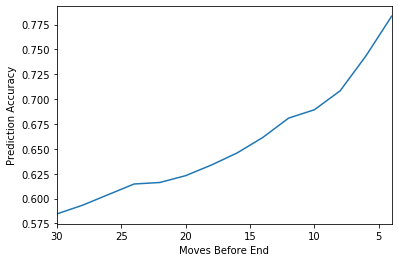

In [ ]:
plt.plot(cutoffs, accs)
plt.xlabel("Moves Before End")
plt.ylabel("Prediction Accuracy")
ax = plt.gca()
ax.set_xlim(30,4)
plt.show()

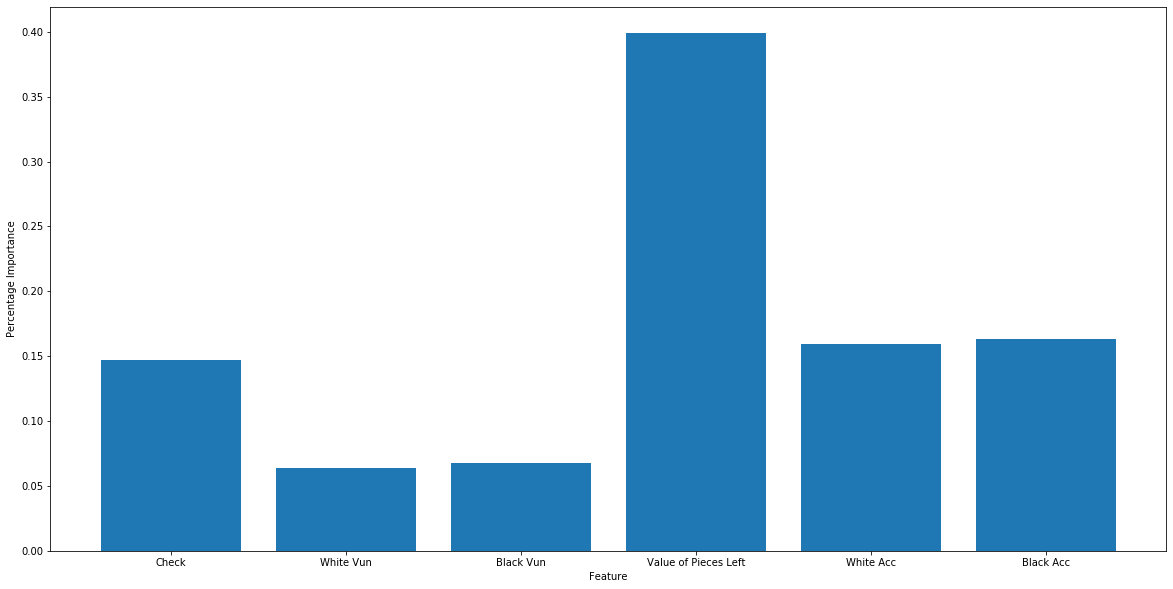

In [ ]:
plt.figure(figsize = (20, 10))
plt.bar(['Check','White Vun','Black Vun','Value of Pieces Left','White Acc','Black Acc'], importances)
plt.xlabel("Feature")
plt.ylabel("Percentage Importance")
plt.show()

In [ ]:
# check plot

checks = []
for feat in feature_list:
  checks.append(feat[0])

print(checks)
check_df = pd.DataFrame(checks)
check_df = check_df.rename(columns = {0:"check"})
check_df = check_df["check"].value_counts().reset_index().rename(columns = {"index": "check", "check": "number of times"})
print(check_df)

x = check_df["check"]
y = check_df["number of times"]

plt.figure(figsize = (5,10))
plt.gca()
plt.xlim([-1, 2])
plt.ylim([0, 120000])
plt.xticks(np.arange(0, 2, 1))
plt.yticks(np.arange(0, 120000, 20000))
plt.bar(x,y)
plt.ylabel('number of times check value appears')
plt.xlabel("check (0: no, 1: yes)")
plt.title("Check Feature Distribution")

plt.show()


In [ ]:
# white vun plot

white_vun_plot = []
for feat in feature_list:
  white_vun_plot.append(feat[1])

print(white_vun_plot)
white_vun_df = pd.DataFrame(white_vun_plot)
white_vun_df = white_vun_df.rename(columns = {0:"value count"})
white_vun_df = white_vun_df["value count"].value_counts().reset_index().rename(columns = {"index": "sum of vulnerable pieces", "value count": "number of times"})
print(white_vun_df)

x = white_vun_df["sum of vulnerable pieces"]
y = white_vun_df["number of times"]

plt.figure(figsize = (5,10))
plt.gca()
plt.xlim([-1, 29])
plt.ylim([0, 25000])
plt.xticks(np.arange(0, 25, 5))
plt.yticks(np.arange(0, 25000, 5000))
plt.bar(x,y)
plt.ylabel('number of times each vulnerable piece value appears')
plt.xlabel("sum of vulnerable pieces")
plt.title("White Vulnerable Pieces Feature Distribution")

plt.show()


In [ ]:
# black vun plot

black_vun_plot = []
for feat in feature_list:
  black_vun_plot.append(feat[2])

print(black_vun_plot)
black_vun_df = pd.DataFrame(black_vun_plot)
black_vun_df = black_vun_df.rename(columns = {0:"value count"})
black_vun_df = black_vun_df["value count"].value_counts().reset_index().rename(columns = {"index": "sum of vulnerable pieces", "value count": "number of times"})
print(black_vun_df)

x = black_vun_df["sum of vulnerable pieces"]
y = black_vun_df["number of times"]

plt.figure(figsize = (5,10))
plt.gca()
plt.xlim([-1, 29])
plt.ylim([0, 25000])
plt.xticks(np.arange(0, 25, 5))
plt.yticks(np.arange(0, 25000, 5000))
plt.bar(x,y)
plt.ylabel('number of times each vulnerable piece value appears')
plt.xlabel("sum of vulnerable pieces")
plt.title("Black Vulnerable Pieces Feature Distribution")

plt.show()

In [ ]:
# white acc plot

white_acc_plot = []
for feat in feature_list:
  white_acc_plot.append(feat[4])

print(white_acc_plot)
white_acc_df = pd.DataFrame(white_acc_plot)
white_acc_df = white_acc_df.rename(columns = {0:"value count"})
white_acc_df = white_acc_df["value count"].value_counts().reset_index().rename(columns = {"index": "sum of accessible squares", "value count": "number of times"})
print(white_acc_df)

x = white_acc_df["sum of accessible squares"]
y = white_acc_df["number of times"]

plt.figure(figsize = (5,10))
plt.gca()
plt.xlim([-1, 51])
plt.ylim([0, 8000])
plt.xticks(np.arange(0, 50, 5))
plt.yticks(np.arange(0, 8000, 2000))
plt.bar(x,y)
plt.ylabel('number of times each vulnerable piece value appears')
plt.xlabel("sum of accessible squares")
plt.title("White Accessible Squares Feature Distribution")

plt.show()

In [ ]:
# black acc plot

black_acc_plot = []
for feat in feature_list:
  black_acc_plot.append(feat[5])

print(black_acc_plot)
black_acc_df = pd.DataFrame(black_acc_plot)
black_acc_df = black_acc_df.rename(columns = {0:"value count"})
black_acc_df = black_acc_df["value count"].value_counts().reset_index().rename(columns = {"index": "sum of accessible squares", "value count": "number of times"})
print(black_acc_df)

x = black_acc_df["sum of accessible squares"]
y = black_acc_df["number of times"]

plt.figure(figsize = (5,10))
plt.gca()
plt.xlim([-1, 51])
plt.ylim([0, 8000])
plt.xticks(np.arange(0, 50, 5))
plt.yticks(np.arange(0, 8000, 2000))
plt.bar(x,y)
plt.ylabel('number of times each vulnerable piece value appears')
plt.xlabel("sum of accessible squares")
plt.title("Black Accessible Squares Feature Distribution")

plt.show()